In [31]:
import cv2

In [32]:
import matplotlib.pyplot as plt

In [33]:
import pandas as pd

In [4]:
image = cv2.imread("dataset/0/0/10.png", cv2.IMREAD_UNCHANGED)

In [5]:
print(image is None)

False


In [6]:
image.min

<function ndarray.min>

In [7]:
image.shape


(28, 28, 4)

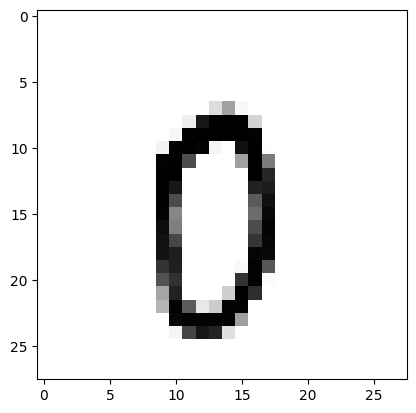

In [8]:
plt.imshow(image)


In [9]:
print(image.max())

255


In [10]:
image = cv2.imread("dataset/0/0/1.png", cv2.IMREAD_UNCHANGED)
print("Shape:", image.shape)
print("Max pixel value:", image.max())


Shape: (28, 28, 4)
Max pixel value: 255


In [11]:
image.shape

(28, 28, 4)

In [12]:
import os

In [13]:
testimage = cv2.imread("dataset/1/1/0.png", cv2.IMREAD_UNCHANGED)

In [14]:
testimage.shape

(28, 28, 4)

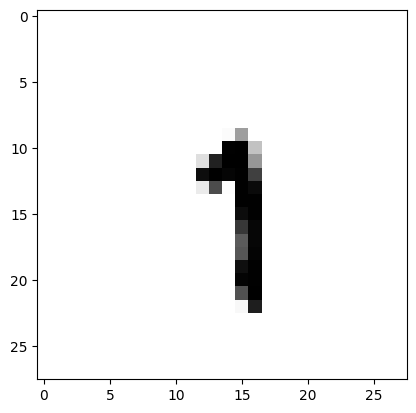

In [15]:
plt.imshow(testimage)

In [34]:
def image_preprocess(pathforimage):
    image = cv2.imread(pathforimage, cv2.IMREAD_UNCHANGED)
    grayimage = image[:,:,3]
    threashold = 127
    _, binary = cv2.threshold(grayimage, threashold, 255, cv2.THRESH_BINARY)
    return binary

In [17]:
extractfolderpath = "dataset/9/9"
savefolderpath = "pre9"

compteur = 0

for filename in os.listdir(extractfolderpath):
    image_path = os.path.join(extractfolderpath, filename)
    binary = image_preprocess(image_path)
    cv2.imwrite(f"{savefolderpath}/{compteur}.png", binary)
    compteur = compteur + 1

In [18]:
image = cv2.imread("pre0/0.png", cv2.IMREAD_UNCHANGED)
print("Shape:", image.shape)
print("Max pixel value:", image.max())


Shape: (28, 28)
Max pixel value: 255


(28, 28)


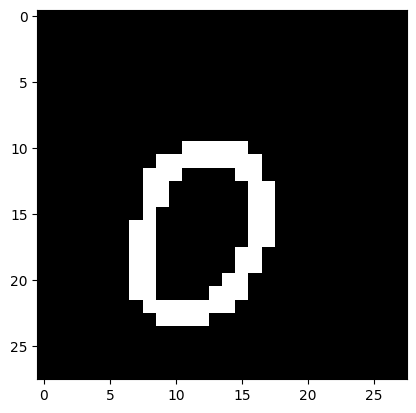

(28, 28)


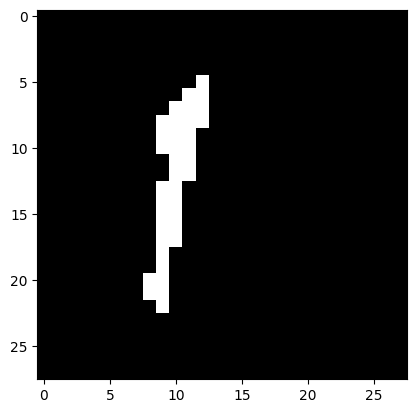

(28, 28)


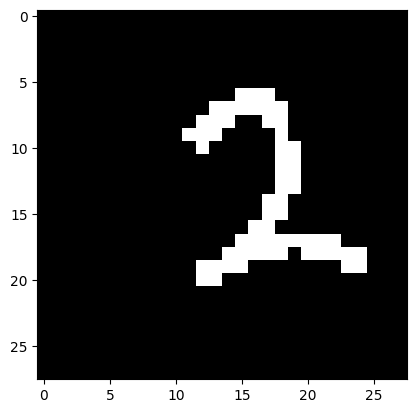

(28, 28)


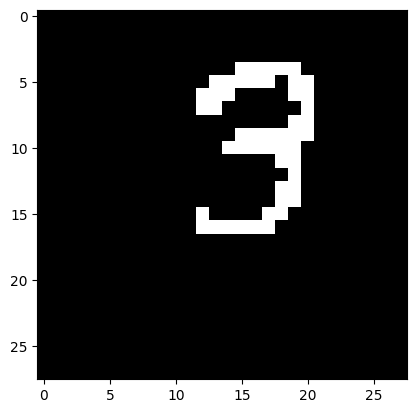

(28, 28)


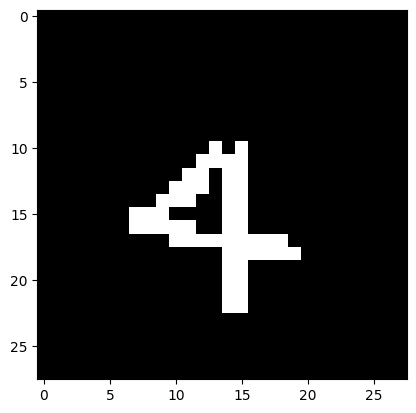

(28, 28)


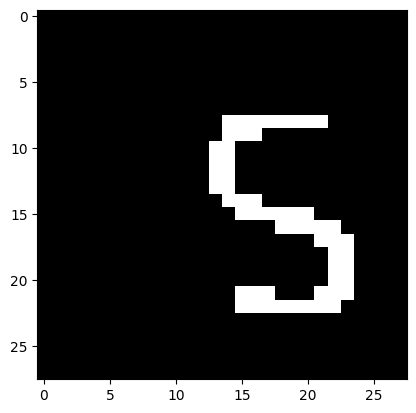

(28, 28)


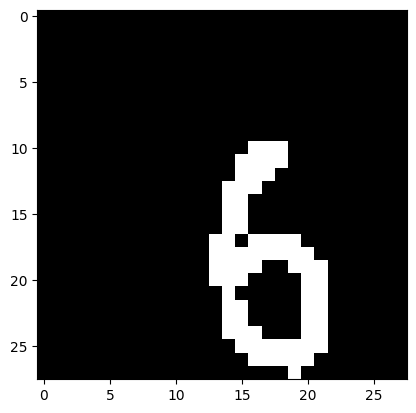

(28, 28)


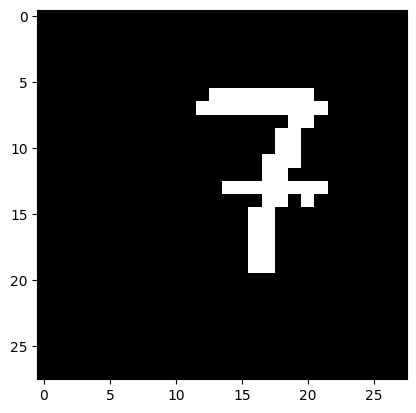

(28, 28)


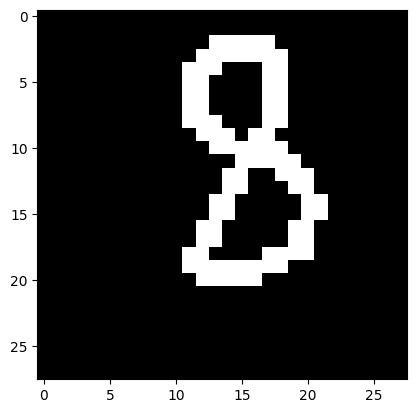

(28, 28)


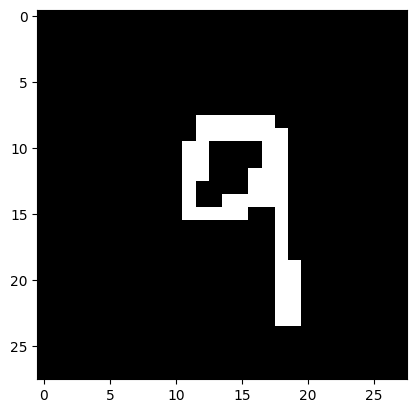

In [19]:
for i in range(0, 10):
    image = cv2.imread(f"pre{i}/{i}.png", cv2.IMREAD_UNCHANGED)
    print(image.shape)
    plt.imshow(image, cmap="gray")
    plt.show()


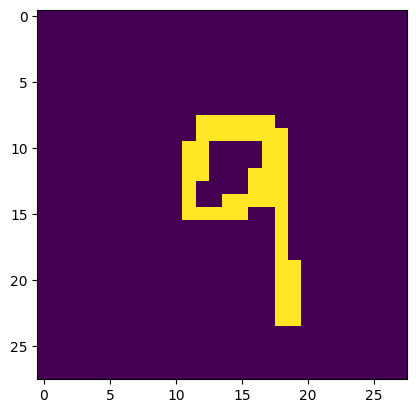

In [20]:
plt.imshow(image)

In [35]:
import tensorflow as tf

In [36]:
from tensorflow import keras

In [37]:
from tensorflow.keras import layers

In [38]:
from tensorflow.keras.models import Sequential

In [39]:
import os

In [40]:
len(list(os.listdir("pre0")))

10773

In [27]:
for i in range(0, 10):
    x = len(list(os.listdir(f"pre{i}")))
    print(x)

10773
10773
10773
10773
10773
10773
10773
10773
10773
10773


In [28]:
for i in range(0,10):
    os.makedirs(f"pre{i}train", exist_ok=True)
    os.makedirs(f"pre{i}test", exist_ok=True)

In [29]:
import shutil

In [30]:
import os
import shutil

for i in range(10):
    source_folder = f"pre{i}"
    train_folder = f"pre{i}train"
    test_folder = f"pre{i}test"


    files = sorted(os.listdir(source_folder))

    train_files = files[:-2500] if len(files) > 2500 else []
    test_files = files[-2500:]

    for filename in train_files:
        src = os.path.join(source_folder, filename)
        dst = os.path.join(train_folder, filename)
        if os.path.isfile(src):
            shutil.copy(src, dst)

    for filename in test_files:
        src = os.path.join(source_folder, filename)
        dst = os.path.join(test_folder, filename)
        if os.path.isfile(src):
            shutil.copy(src, dst)

print("Split and copy complete.")


KeyboardInterrupt: 

In [ ]:
for i in range(0, 10):
    x = len(list(os.listdir(f"pre{i}train")))
    y = len(list(os.listdir(f"pre{i}test")))

    print("train", x)
    print("test", y)

train 8273
test 2500
train 8273
test 2500
train 8273
test 2500
train 8273
test 2500
train 8273
test 2500
train 8273
test 2500
train 8273
test 2500
train 8273
test 2500
train 8273
test 2500
train 8273
test 2500


In [ ]:
image = cv2.imread("pre7test/80.png", cv2.IMREAD_UNCHANGED)

In [ ]:
image.shape

(28, 28)

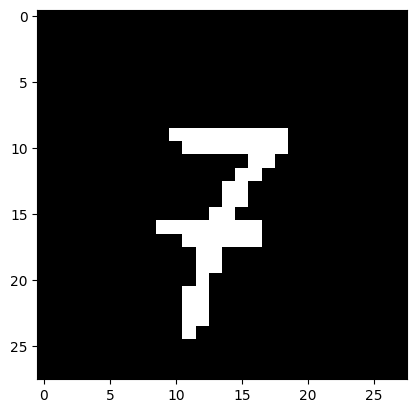

In [ ]:
plt.imshow(image, cmap="gray")

In [ ]:
image.shape

(28, 28)

In [ ]:
for i in range(0, 10):
    os.rename(f"train/pre{i}train", f"train/{i}")
    os.rename(f"test/pre{i}test", f"test/{i}")

In [56]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'train',
    image_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=123
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    'train',
    image_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=123
)

Found 82730 files belonging to 10 classes.
Using 66184 files for training.
Found 82730 files belonging to 10 classes.
Using 16546 files for validation.


In [57]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    image_size=(28,28),
    color_mode = "grayscale",
    batch_size = 128
)

Found 25000 files belonging to 10 classes.


In [58]:
for x, y in train_dataset.take(1):
    print("Train batch shape:", x.shape, y.shape)

Train batch shape: (32, 28, 28, 1) (32,)


2025-07-21 15:00:14.617609: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
batch = next(iter(train_dataset))
print(type(batch))
print(len(batch))

<class 'tensorflow.python.framework.ops.EagerTensor'>
32


In [46]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [47]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [59]:
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [61]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

<_TakeDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>
129


ValueError: too many values to unpack (expected 2)

In [62]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3
)

Epoch 1/3
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 0.8928 - loss: 0.3222 - val_accuracy: 0.9989 - val_loss: 0.0031
Epoch 2/3
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 0.9971 - loss: 0.0091 - val_accuracy: 0.9999 - val_loss: 2.7395e-04
Epoch 3/3
2069/2069 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 0.9988 - loss: 0.0039 - val_accuracy: 0.9999 - val_loss: 1.2674e-04


In [63]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 1.0000 - loss: 1.0388e-04
Test accuracy: 1.0


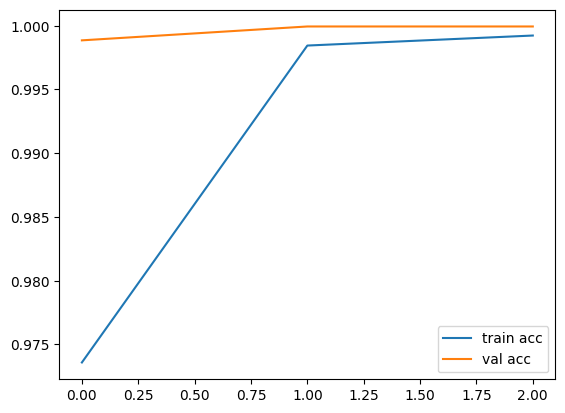

In [64]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [41]:
from tensorflow.keras.preprocessing import image

In [42]:
img = image.load_img("test/6/93.png", color_mode='grayscale', target_size=(28, 28))


In [43]:
img_array = image.img_to_array(img)


In [ ]:
img_array = img_array / 255.0


In [ ]:
import numpy as np

In [ ]:
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
predictions = model.predict(img_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


In [ ]:
predicted_class = np.argmax(predictions[0])
print(f"Predicted class: {predicted_class}")

Predicted class: 6


In [65]:
model.save("MNISTModel3.keras")
